<a href="https://colab.research.google.com/github/sashaTribe/legalDocNLP/blob/main/pyVisualise_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
import pandas as pd
new_train_data = pd.read_csv('/content/drive/My Drive//new_train_data.csv')

In [ ]:
from gensim.utils import simple_preprocess
from gensim import corpora
legal_text = new_train_data['ngrams'].apply(simple_preprocess)                                                            
from gensim.models import LdaModel
from gensim.corpora import MmCorpus 

In [ ]:
id2word = corpora.Dictionary(legal_text)
bow_corpus = [id2word.doc2bow(text) for text in legal_text]

In [ ]:
import gensim
LDA = gensim.models.ldamodel.LdaModel
from gensim.models.coherencemodel import CoherenceModel
lda_model_1 = LDA(corpus=bow_corpus,
                                           id2word=id2word,
                                           num_topics=35, 
                                           random_state=100,
                                           chunksize=500,
                                           passes=50,
                                           iterations = 400,
                                           alpha = 'auto',
                                           per_word_topics=True
                                         )


coherence_model_lda_1 = CoherenceModel(model=lda_model_1, texts=legal_text, dictionary=id2word, coherence='c_v')
temp_file = "/content/drive/MyDrive/lda_model_35_topics"

lda_model_1.save(temp_file) 

In [ ]:
import gensim
LDA = gensim.models.ldamodel.LdaModel
from gensim.models.coherencemodel import CoherenceModel
lda_model_2 = LDA(corpus=bow_corpus,
                                           id2word=id2word,
                                           num_topics=38, 
                                           random_state=100,
                                           chunksize=500,
                                           passes=50,
                                           iterations = 400,
                                           alpha = 'auto',
                                           per_word_topics=True
                                         )


coherence_model_lda_2 = CoherenceModel(model=lda_model_2, texts=legal_text, dictionary=id2word, coherence='c_v')
temp_file = "/content/drive/MyDrive/lda_model_38_topics"

lda_model_2.save(temp_file)

In [ ]:
print("Coherence Value: ", coherence_model_lda_1.get_coherence()) 
print("Coherence Value: ", coherence_model_lda_2.get_coherence())

Coherence Value:  0.4869483689210329
Coherence Value:  0.4890748836879919


In [ ]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()


lda_display = gensimvis.prepare(lda_model_2, bow_corpus, id2word, sort_topics=False)

pyLDAvis.display(lda_display)

In [ ]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

original_text = new_train_data['text']
df_dominant_topic_per_doc = format_topics_sentences(ldamodel=lda_model_2, corpus=bow_corpus, texts=original_text)


df_dominant_topic_per_doc = df_topic_sents_keywords.reset_index()
df_dominant_topic_per_doc = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic_per_doc.head(10)

In [ ]:
df_dominant_topic_per_doc.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Dominant_Topic,Perc_Contribution,Topic_Keywords,text
0,34,0.3864,"section, statute, provision, language, provide...","OPINION\nIn 2007, the Monterey Bay Unified Air..."
1,33,0.3236,"court, attorney, state, counsel, hear, judge, ...","OPINION\nSteven L. Kanai, a cadet in his final..."
2,16,0.1610,"evidence, trial, testimony, jury, find, testif...",Luhr Bros. Inc. (“Luhr”) brought this civil an...
3,28,0.4537,"agency, information, review, require, record, ...",OPINION\nThe issue in this environmental case ...
4,23,0.4344,"defendant, unite_state, conviction, offense, s...",Appellant Neliza Figueroa-Cartagena (“Neliza”)...


In [ ]:
df_topic_sents_keywords=df_dominant_topic_per_doc
df_dominant_topic_per_doc = pd.DataFrame()
df_dominant_topic_per_doc = df_topic_sents_keywords.reset_index()
df_dominant_topic_per_doc = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic_per_doc.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AttributeError: ignored

In [ ]:
data_dict = {'dominant_topic':[], 'perc_contribution':[], 'topic_keywords':[], 'legal_text':[]}

for i, row in enumerate(lda_model_2[bow_corpus]):
    #print(i)
    #row = sorted(row, key=lambda x: x[1], reverse=True)
    data_dict['legal_text'] = new_train_data.loc[i,'text']
    #print(row)
    for j, (topic_num, prop_topic) in enumerate(row):
        wp = model.show_topic(topic_num)
        topic_keywords = ", ".join([word for word, prop in wp])
        data_dict['dominant_topic'].append(int(topic_num))
        data_dict['perc_contribution'].append(round(prop_topic, 3))
        data_dict['topic_keywords'].append(topic_keywords)
        #print(topic_keywords)
        break

df_topics = pd.DataFrame(data_dict)

contents = pd.Series(posts)


df_topics.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: ignored

In [ ]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)
lda_model_2 = LDA.load('')

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model_2, corpus=bow_corpus, texts=original_text)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt
topic_counts = df_dominant_topic["Dominant_Topic"].value_counts()
plt.plot(topic_counts, color = "mediumseagreen", figsize = (12,6))
plt.title("how many documents belong to each topic", size = 18)
plt.xlabel("Topics", size = 16)
plt.ylabel("Number of documents", size = 16)

NameError: ignored

In [ ]:
import matplotlib.plot as plt

ModuleNotFoundError: ignored

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


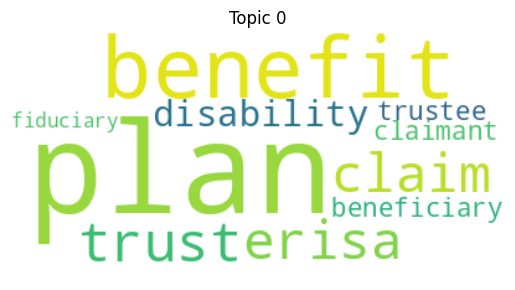

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


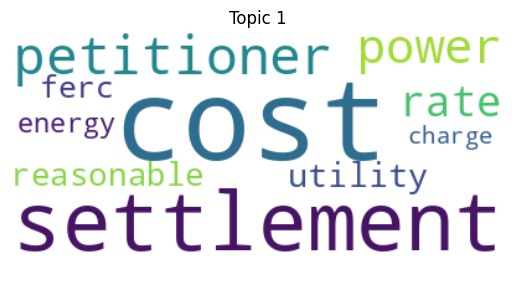

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


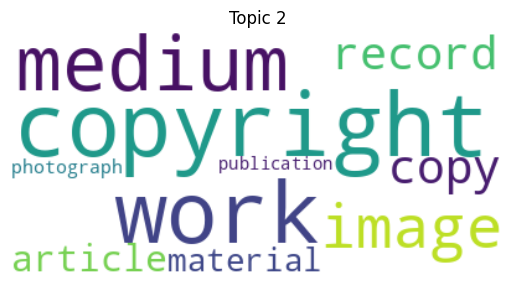

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


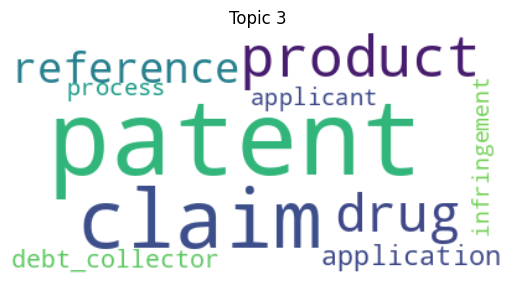

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


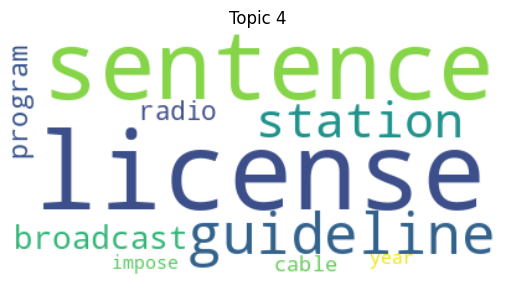

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


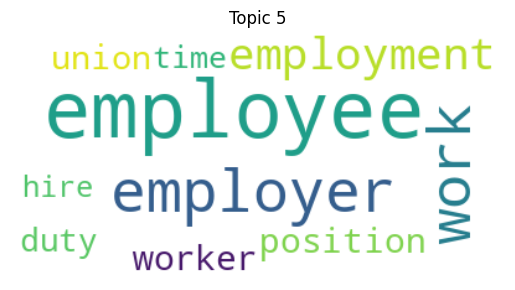

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


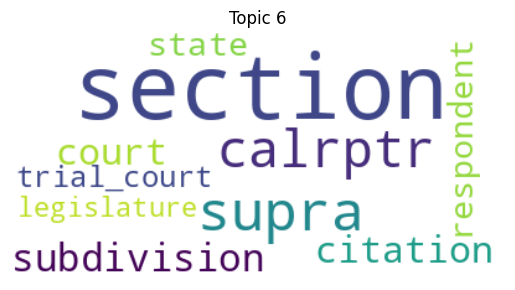

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


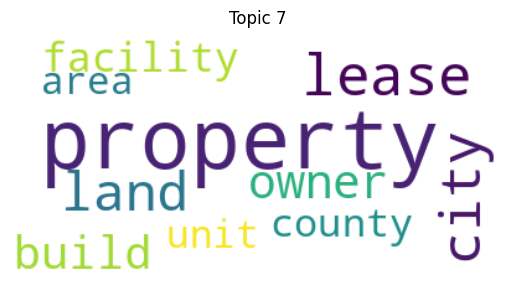

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


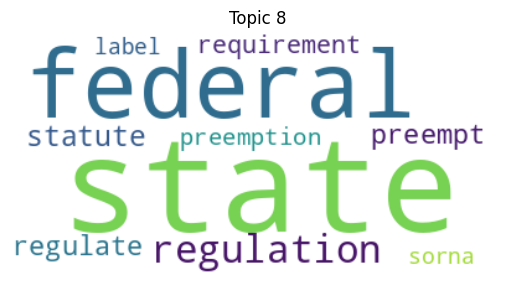

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


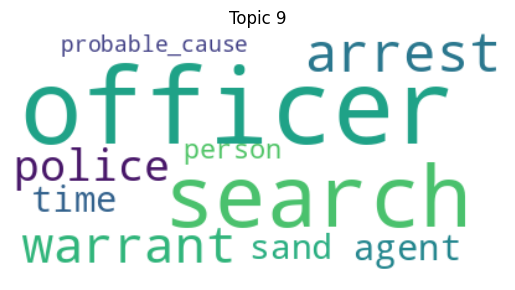

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


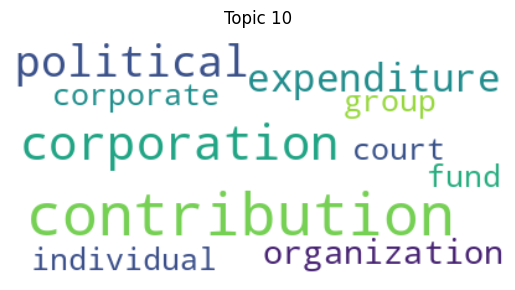

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


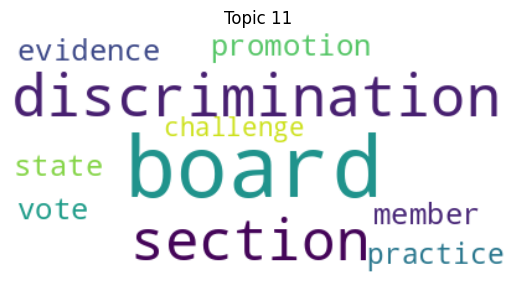

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


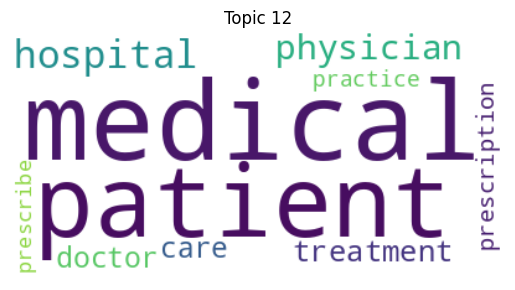

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


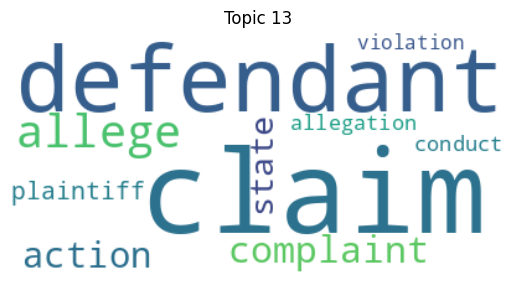

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


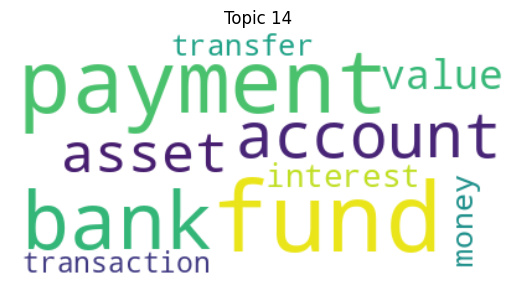

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


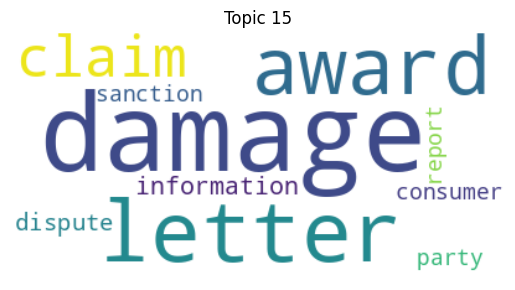

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


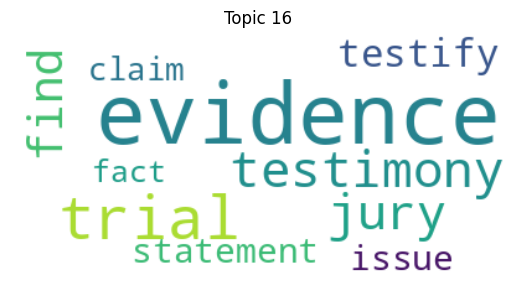

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


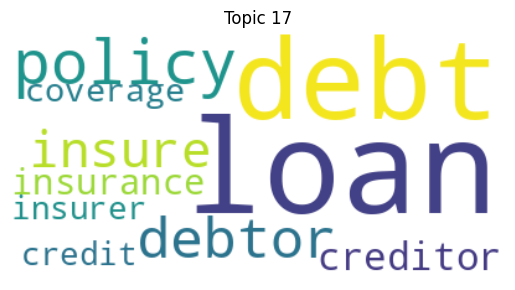

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


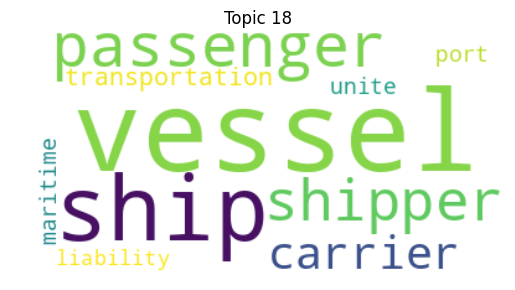

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


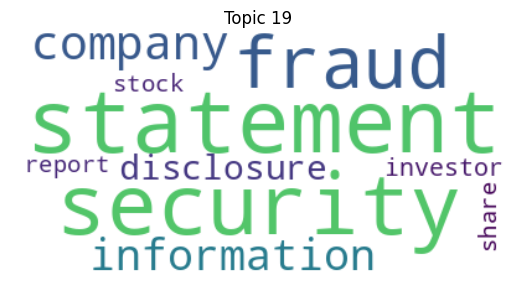

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


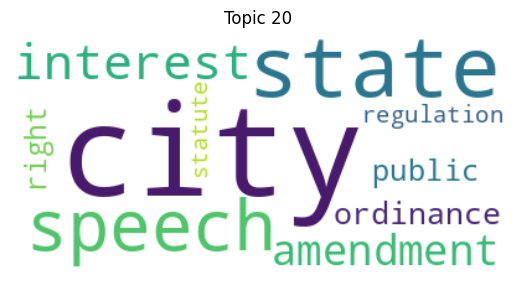

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


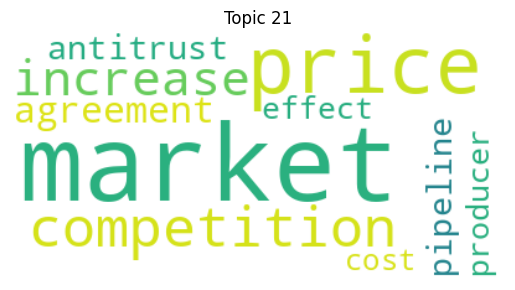

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


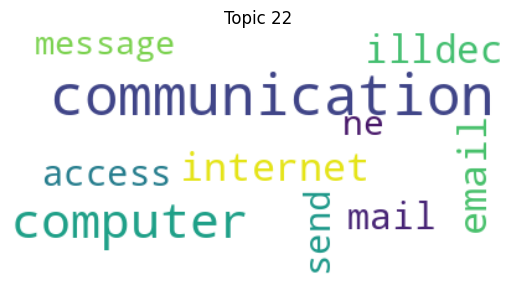

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


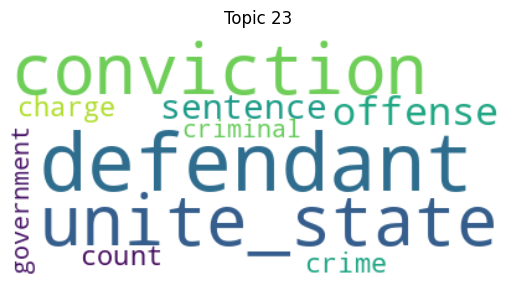

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


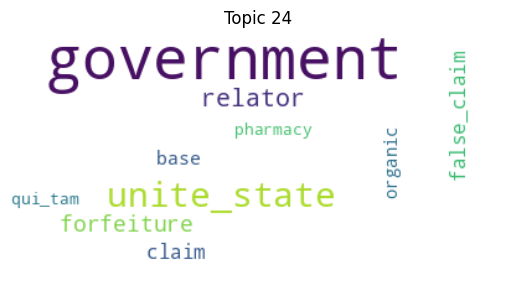

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


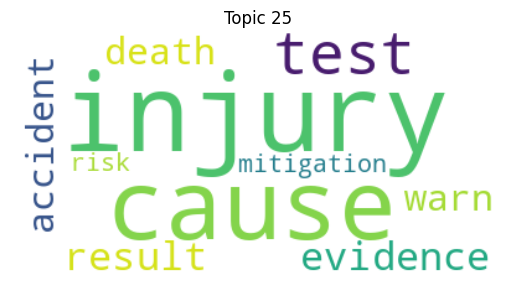

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


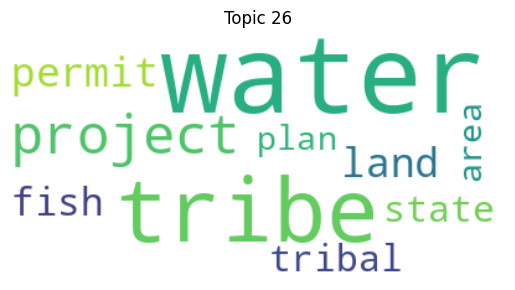

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


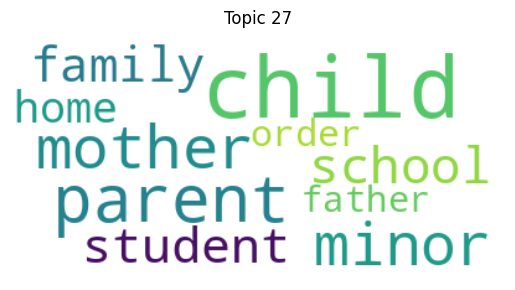

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


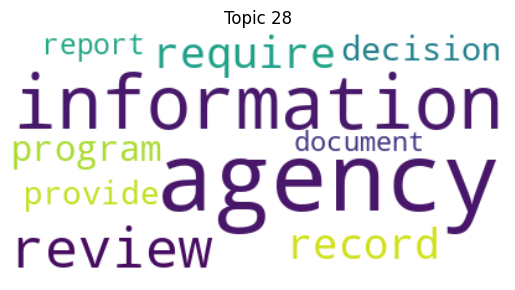

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


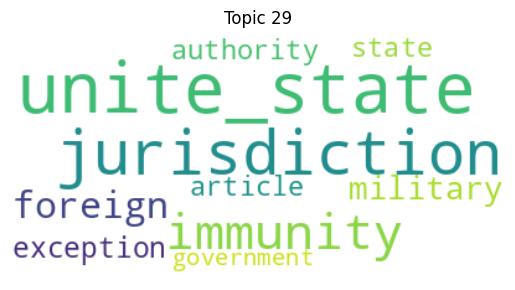

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


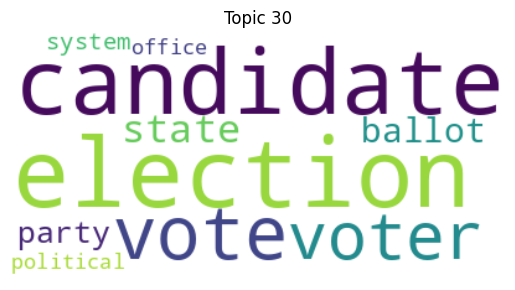

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


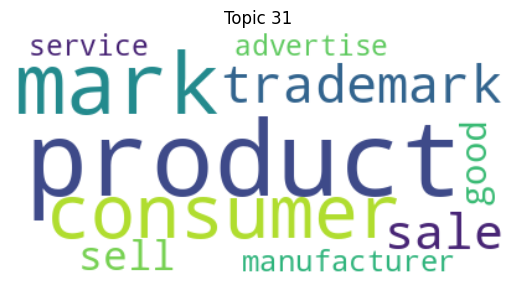

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


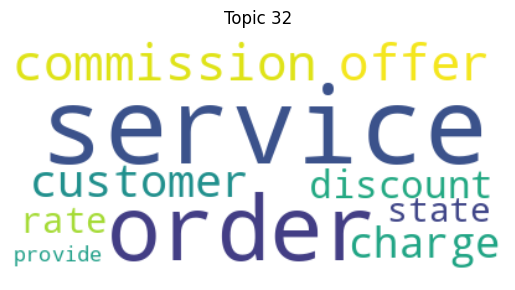

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


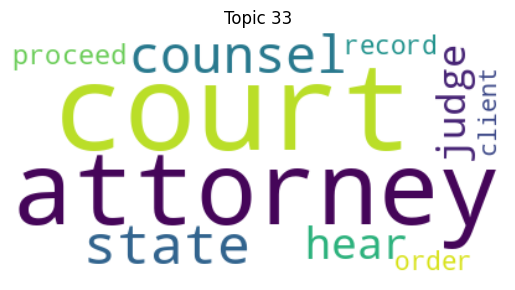

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


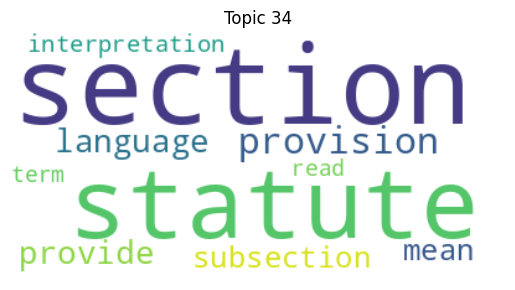

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


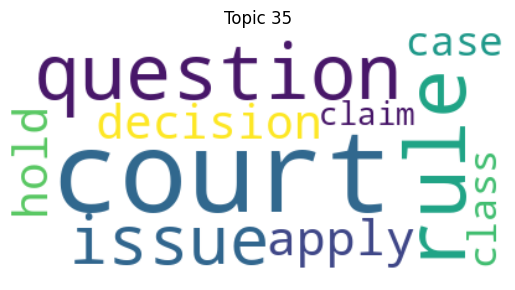

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


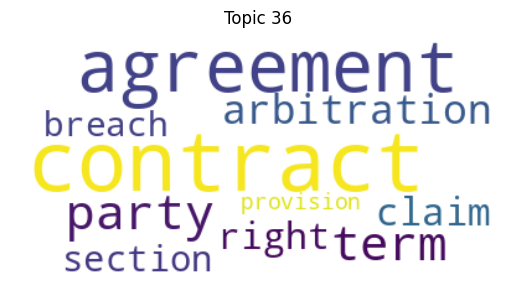

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


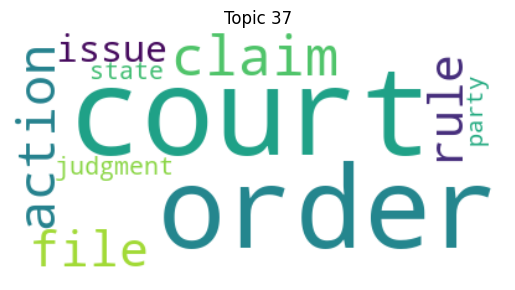

In [ ]:
import matplotlib.colors as mcolors
from collections import Counter
from matplotlib.ticker import FuncFormatter
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
from wordcloud import WordCloud
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

def create_wordcloud(model, topic):
    text = {word: value for word, value in model.show_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic" + " "+ str(topic))
    plt.show()
for i in range(0,38,1):
    create_wordcloud(lda_model_2, topic=i)

In [ ]:
path = '/content/drive/My Drive/lda_df_topics.csv'

In [ ]:
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_dominant_topic.to_csv(f)

In [ ]:
import gensim

In [ ]:
import gensim.models

In [ ]:
LDA = gensim.models.ldamodel.LdaModel

In [ ]:
lda_model_2 = LDA.load('/content/drive/My Drive/lda_model_38_topics')

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=None):
    sent_topics_df = pd.DataFrame()
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        contribution_val = 0
        topic_no = 0
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:
                wp = ldamodel.show_topic(topic_num)
                topic_no = int(topic_num)
                contribution_val = round(prop_topic,4)
            else:
                break
    return [topic_no, contribution_val]

In [ ]:
test_data_df = pd.read_csv('/content/drive/My Drive/test_data.csv')

In [ ]:
test_legal_data = test_data_df['clean_data']

In [ ]:
print(test_legal_data[0])

['opinion', 'overview', 'appellant', 'group', 'relate', 'company', 'principal', 'engage', 'business', 'marketing', 'sell', 'internet', 'kiosk', 'investment', 'opportunity', 'summary', 'judgment', 'district', 'court', 'find', 'appellant', 'civilly', 'liable', 'make', 'material', 'misrepresentation', 'engage', 'deceptive', 'business', 'practice', 'violation', 'section', 'act', 'u.s.c', 'a', 'ftc', 'franchise', 'rule', 'c.f.r', 'remedy', 'district', 'court', 'impose', 'liability', 'equitable', 'monetary', 'relief', 'company', 'owner', 'senior', 'officer', 'court', 'determine', 'fee', 'appellant', 'attorney', 'pay', 'fund', 'derive', 'unlawful', 'activity', 'court', 'also', 'impose', 'constructive', 'trust', 'portion', 'fee', 'appeal', 'appellant', 'contend', 'district', 'court', 'err', 'impose', 'constructive', 'trust', 'attorney', 'fee', 'assert', 'unresolved', 'issue', 'fact', 'regard', 'appellant', 'mental', 'state', 'preclude', 'summary', 'judgment', 'reason', 'explain', 'below', 'aff

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
import nltk.data
from nltk.corpus import reuters
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk import ngrams

In [ ]:
nltk.download('stopwords')
sw_nltk = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
!pip install us
import us

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.6/132.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for us: filename=us-2.0.2-py3-none-any.whl size=11941 sha256=357383cbf43e938a9a131d1a5d7f35eccff4103805109bb9d1e036e9c40fe0c1
  Stored in directory: /root/.cache/pip/wheels/b0/2a/8b/46c38c4bc2d65459d10a393292c197faf7d1071bc6177f84a4
  Created wheel for jellyfish: filename=jellyfish-0.6.1-cp310-cp310-linux_x86_64.whl size=83080 sha256=12de4b09bb9a3152b542a163f6de680159fa7ab53646968e44db269da578fc99
  Stored in directory: /root/.cache/pip/wheels/b4/50/f2/2a1bd2c756df70adc1f703e09453b6f68255385789b32107ae
Successfully built us jellyfish


In [ ]:
us_states = list(us.states.STATES)
low_us_states = str(us_states).lower()
def join_words(lst):
  words = []
  for word in lst:
    if ' ' in word:
      new_word = word.replace(' ', '_')
      words.append(new_word)
    else:
      words.append(word)
  return words
new_state_list = join_words(low_us_states)


In [ ]:
month_list = ["january","february","march","april","may","june","july","august","september","october","november","december"]
print(month_list)

In [ ]:
import string
new_us_list = []
for word in us_states:
  new_us_list.append(str(word).lower())
print(new_us_list)
words_i_dont_want = []
#words_i_dont_want = stopwords 
words_i_dont_want.extend(['usc','f3d','f2d'])
punctuation = list(string.punctuation)
punctuation.remove('_')
words_i_dont_want.extend(punctuation)
words_i_dont_want.extend(month_list)
words_i_dont_want.extend(final_us_list)

['alabama', 'alaska', 'arizona', 'arkansas', 'california', 'colorado', 'connecticut', 'delaware', 'florida', 'georgia', 'hawaii', 'idaho', 'illinois', 'indiana', 'iowa', 'kansas', 'kentucky', 'louisiana', 'maine', 'maryland', 'massachusetts', 'michigan', 'minnesota', 'mississippi', 'missouri', 'montana', 'nebraska', 'nevada', 'new hampshire', 'new jersey', 'new mexico', 'new york', 'north carolina', 'north dakota', 'ohio', 'oklahoma', 'oregon', 'pennsylvania', 'rhode island', 'south carolina', 'south dakota', 'tennessee', 'texas', 'utah', 'vermont', 'virginia', 'washington', 'west virginia', 'wisconsin', 'wyoming']


NameError: ignored

In [ ]:
test_data_df["text"]=test_data_df["text"].str.lower()
test_data_df

,Unnamed: 0,file name,topic,text
0,7094,case1147.txt,11,opinion\noverview\nappellants are a group of r...
1,1017,case101.txt,70,christina agola is an attorney practicing prim...
2,2850,case254.txt,61,opinion\nthis case requires us to address a qu...
3,1452,case190.txt,68,midamerican energy company (“mec”) appeals the...
4,457,case1093.txt,75,"generally, when employees of independent contr..."
...,...,...,...,...
1515,5112,case23.txt,28,the city of cranston appeals from an injunctio...
1516,4043,case144.txt,33,opinion of the court\nhaving lost in state cou...
1517,4417,case138.txt,29,opinion\nrose wong and patrick gibson (togethe...
1518,2707,case175.txt,56,"california's three strikes law (pen.code, §§ 6..."


In [ ]:
test_data_df['tokenized'] = test_data_df['text'].apply(lambda x: nltk.word_tokenize(x))
test_data_df

,Unnamed: 0,file name,topic,text,tokenized
0,7094,case1147.txt,11,opinion\noverview\nappellants are a group of r...,"[opinion, overview, appellants, are, a, group,..."
1,1017,case101.txt,70,christina agola is an attorney practicing prim...,"[christina, agola, is, an, attorney, practicin..."
2,2850,case254.txt,61,opinion\nthis case requires us to address a qu...,"[opinion, this, case, requires, us, to, addres..."
3,1452,case190.txt,68,midamerican energy company (“mec”) appeals the...,"[midamerican, energy, company, (, “, mec, ”, )..."
4,457,case1093.txt,75,"generally, when employees of independent contr...","[generally, ,, when, employees, of, independen..."
...,...,...,...,...,...
1515,5112,case23.txt,28,the city of cranston appeals from an injunctio...,"[the, city, of, cranston, appeals, from, an, i..."
1516,4043,case144.txt,33,opinion of the court\nhaving lost in state cou...,"[opinion, of, the, court, having, lost, in, st..."
1517,4417,case138.txt,29,opinion\nrose wong and patrick gibson (togethe...,"[opinion, rose, wong, and, patrick, gibson, (,..."
1518,2707,case175.txt,56,"california's three strikes law (pen.code, §§ 6...","[california, 's, three, strikes, law, (, pen.c..."


In [ ]:
from nltk.tokenize import sent_tokenize
import spacy
nlp = spacy.load('en_core_web_sm')
def delete_names(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    #for sent in texts:
    doc = nlp(" ".join(texts)) 
    texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    texts_out = [s for S in texts_out for s in S]
    return texts_out

def remove_short_words(text):
  return  ''.join([word for word in text if len(word)>3])
def remove_numerics(text):
  #sentences=list(text)
  #sentence_stream = [doc for doc in text]
  return  ''.join([word for word in text if not word.isnumeric()])

In [ ]:
test_data_df['lemmatized'] = test_data_df['tokenized'].apply(delete_names)
test_data_df

,Unnamed: 0,file name,topic,text,tokenized,lemmatized
0,7094,case1147.txt,11,opinion\noverview\nappellants are a group of r...,"[opinion, overview, appellants, are, a, group,...","[opinion, overview, appellant, group, relate, ..."
1,1017,case101.txt,70,christina agola is an attorney practicing prim...,"[christina, agola, is, an, attorney, practicin...","[attorney, practice, primarily, employment, la..."
2,2850,case254.txt,61,opinion\nthis case requires us to address a qu...,"[opinion, this, case, requires, us, to, addres...","[opinion, case, require, address, question, fi..."
3,1452,case190.txt,68,midamerican energy company (“mec”) appeals the...,"[midamerican, energy, company, (, “, mec, ”, )...","[company, appeal, district, court, ruling, sum..."
4,457,case1093.txt,75,"generally, when employees of independent contr...","[generally, ,, when, employees, of, independen...","[generally, employee, independent, contractor,..."
...,...,...,...,...,...,...
1515,5112,case23.txt,28,the city of cranston appeals from an injunctio...,"[the, city, of, cranston, appeals, from, an, i...","[city, appeal, injunction, enter, district, co..."
1516,4043,case144.txt,33,opinion of the court\nhaving lost in state cou...,"[opinion, of, the, court, having, lost, in, st...","[opinion, court, lose, state, court, great, we..."
1517,4417,case138.txt,29,opinion\nrose wong and patrick gibson (togethe...,"[opinion, rose, wong, and, patrick, gibson, (,...","[opinion, rise, together, plaintiff, file, law..."
1518,2707,case175.txt,56,"california's three strikes law (pen.code, §§ 6...","[california, 's, three, strikes, law, (, pen.c...","[strike, law, subds, i, subds, increase, maxim..."


In [ ]:
from gensim.models.phrases import Phraser, Phrases
connector_words = ["of", "with","without", "in", "the", "for", "to"]
connector_words.extend(["section","article","law","legislation","attorney","lawyer","program","act",])
ngram_phrases = Phrases(sentences=test_data_df['lemmatized'], 
                         min_count=100, 
                         threshold=3,connector_words = connector_words)
ngram_phraser = Phraser(ngram_phrases)
print('Number of bigrams learned: ', len(ngram_phrases.export_phrases()))
print()
print('Learned bigrams:')
print(ngram_phrases.export_phrases())

Number of bigrams learned:  743

Learned bigrams:
{'summary_judgment': 118.50657426332648, 'district_court': 22.384327045652988, 'court_find': 4.411663540404359, 'business_practice': 7.041753349519351, 'u.s.c_a': 25.590872824551898, 'contend_district': 3.713636683481213, 'court_err': 17.559312142689855, 'affirm_district': 10.194476453389953, 'stand_alone': 20.101319105582068, 'credit_card': 182.1823162845385, 'effective_date': 68.95690163398052, 'third_party': 43.98667666967319, 'be_evidence': 5.9603235251346804, 'deposition_testimony': 7.430674923643884, 'non_-': 175.16832637443025, 'e_-': 10.861229452259803, '-_mail': 8.248095573700043, 'more_importantly': 4.625209132230793, 'same_time': 6.768186909663356, 'contractual_obligation': 6.498373396509882, 'defense_counsel': 29.572039763587846, 'hold_liable': 6.015569863153506, 'complaint_allege': 14.005562910842169, 'co_-': 138.24055315471045, 'oral_argument': 103.86608182451533, 'permanent_injunction': 73.81285118889177, 'cros_-': 69.923

In [ ]:
test_data_df["lemmatize_joined"]=test_data_df["lemmatized"].apply(lambda x: ' '.join(x))
test_data_df['lemmatize_joined'] = test_data_df['lemmatize_joined'].astype('str')
test_data_df

,Unnamed: 0,file name,topic,text,tokenized,lemmatized,ngrams,lemmatize_joined
0,7094,case1147.txt,11,opinion\noverview\nappellants are a group of r...,"[opinion, overview, appellants, are, a, group,...","[opinion, overview, appellant, group, relate, ...","[[o, p, i, n, i, o, n], [o, v, e, r, v, i, e, ...",opinion overview appellant group relate compan...
1,1017,case101.txt,70,christina agola is an attorney practicing prim...,"[christina, agola, is, an, attorney, practicin...","[attorney, practice, primarily, employment, la...","[[a, t, t, o, r, n, e, y], [p, r, a, c, t, i, ...",attorney practice primarily employment law wes...
2,2850,case254.txt,61,opinion\nthis case requires us to address a qu...,"[opinion, this, case, requires, us, to, addres...","[opinion, case, require, address, question, fi...","[[o, p, i, n, i, o, n], [c, a, s, e], [r, e, q...",opinion case require address question first im...
3,1452,case190.txt,68,midamerican energy company (“mec”) appeals the...,"[midamerican, energy, company, (, “, mec, ”, )...","[company, appeal, district, court, ruling, sum...","[[c, o, m, p, a, n, y], [a, p, p, e, a, l], [d...",company appeal district court ruling summary j...
4,457,case1093.txt,75,"generally, when employees of independent contr...","[generally, ,, when, employees, of, independen...","[generally, employee, independent, contractor,...","[[g, e, n, e, r, a, l, l, y], [e, m, p, l, o, ...",generally employee independent contractor inju...
...,...,...,...,...,...,...,...,...
1515,5112,case23.txt,28,the city of cranston appeals from an injunctio...,"[the, city, of, cranston, appeals, from, an, i...","[city, appeal, injunction, enter, district, co...","[[c, i, t, y], [a, p, p, e, a, l], [i, n, j, u...",city appeal injunction enter district court fo...
1516,4043,case144.txt,33,opinion of the court\nhaving lost in state cou...,"[opinion, of, the, court, having, lost, in, st...","[opinion, court, lose, state, court, great, we...","[[o, p, i, n, i, o, n], [c, o, u, r, t], [l, o...",opinion court lose state court great western g...
1517,4417,case138.txt,29,opinion\nrose wong and patrick gibson (togethe...,"[opinion, rose, wong, and, patrick, gibson, (,...","[opinion, rise, together, plaintiff, file, law...","[[o, p, i, n, i, o, n], [r, i, s, e], [t, o, g...",opinion rise together plaintiff file lawsuit b...
1518,2707,case175.txt,56,"california's three strikes law (pen.code, §§ 6...","[california, 's, three, strikes, law, (, pen.c...","[strike, law, subds, i, subds, increase, maxim...","[[s, t, r, i, k, e], [l, a, w], [s, u, b, d, s...",strike law subds i subds increase maximum sent...


In [ ]:
def make_ngrams_func(text):
    #sentences=text.values.tolist()
    sentence_stream = [doc for doc in text]
    return [ngram_phrases[doc] for doc in sentence_stream]

test_data_df['ngrams'] = test_data_df['clean_data'].apply(make_ngrams_func)
test_data_df

,Unnamed: 0,file name,topic,text,tokenized,lemmatized,ngrams,lemmatize_joined,clean_data
0,7094,case1147.txt,11,opinion\noverview\nappellants are a group of r...,"[opinion, overview, appellants, are, a, group,...","[opinion, overview, appellant, group, relate, ...","[[[], ['], [o], [p], [i], [n], [i], [o], [n], ...",opinion overview appellant group relate compan...,"['opinion', 'overview', 'appellant', 'group', ..."
1,1017,case101.txt,70,christina agola is an attorney practicing prim...,"[christina, agola, is, an, attorney, practicin...","[attorney, practice, primarily, employment, la...","[[[], ['], [a], [t], [t], [o], [r], [n], [e], ...",attorney practice primarily employment law wes...,"['attorney', 'practice', 'primarily', 'employm..."
2,2850,case254.txt,61,opinion\nthis case requires us to address a qu...,"[opinion, this, case, requires, us, to, addres...","[opinion, case, require, address, question, fi...","[[[], ['], [o], [p], [i], [n], [i], [o], [n], ...",opinion case require address question first im...,"['opinion', 'case', 'require', 'address', 'que..."
3,1452,case190.txt,68,midamerican energy company (“mec”) appeals the...,"[midamerican, energy, company, (, “, mec, ”, )...","[company, appeal, district, court, ruling, sum...","[[[], ['], [c], [o], [m], [p], [a], [n], [y], ...",company appeal district court ruling summary j...,"['company', 'appeal', 'district', 'court', 'ru..."
4,457,case1093.txt,75,"generally, when employees of independent contr...","[generally, ,, when, employees, of, independen...","[generally, employee, independent, contractor,...","[[[], ['], [g], [e], [n], [e], [r], [a], [l], ...",generally employee independent contractor inju...,"['generally', 'employee', 'independent', 'cont..."
...,...,...,...,...,...,...,...,...,...
1515,5112,case23.txt,28,the city of cranston appeals from an injunctio...,"[the, city, of, cranston, appeals, from, an, i...","[city, appeal, injunction, enter, district, co...","[[[], ['], [c], [i], [t], [y], ['], [,], [ ], ...",city appeal injunction enter district court fo...,"['city', 'appeal', 'injunction', 'enter', 'dis..."
1516,4043,case144.txt,33,opinion of the court\nhaving lost in state cou...,"[opinion, of, the, court, having, lost, in, st...","[opinion, court, lose, state, court, great, we...","[[[], ['], [o], [p], [i], [n], [i], [o], [n], ...",opinion court lose state court great western g...,"['opinion', 'court', 'lose', 'state', 'court',..."
1517,4417,case138.txt,29,opinion\nrose wong and patrick gibson (togethe...,"[opinion, rose, wong, and, patrick, gibson, (,...","[opinion, rise, together, plaintiff, file, law...","[[[], ['], [o], [p], [i], [n], [i], [o], [n], ...",opinion rise together plaintiff file lawsuit b...,"['opinion', 'rise', 'together', 'plaintiff', '..."
1518,2707,case175.txt,56,"california's three strikes law (pen.code, §§ 6...","[california, 's, three, strikes, law, (, pen.c...","[strike, law, subds, i, subds, increase, maxim...","[[[], ['], [s], [t], [r], [i], [k], [e], ['], ...",strike law subds i subds increase maximum sent...,"['strike', 'law', 'subds', 'i', 'subds', 'incr..."


In [ ]:
def clean_data(df):
  sentences=df['lemmatize_joined'].values.tolist()
  sentence_stream = [doc.split(" ") for doc in sentences]
    #lst.join()
  df['clean_data'] = sentence_stream

clean_data(test_data_df)
test_data_df['clean_data'] = test_data_df['clean_data'].astype('str')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import sent_tokenize
import pandas as pd
vect = CountVectorizer(min_df=0.1, max_df=1700, stop_words='english', 
                       ngram_range=(1,3))
test_sent_topics = ({'Dominant_Topic':[],
               'Perc_Contribution':[],
               'Document_Text':[]})
sent_topics_for_test_df = pd.DataFrame(test_sent_topics)
#sent_topics_for_test_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Document_Text']

def topic_prediction_df(lda,document):
    string_input = sent_tokenize(document)
    X = vect.fit_transform(string_input)
    corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
    data_row = format_topics_sentences(lda,corpus)
    data_row.append(document)
    return data_row

topic_predictions = []
for doc in test_legal_data:
  sent_topics_for_test_df.loc[len(sent_topics_for_test_df)] = (topic_prediction_df(lda_model_2,doc))

In [ ]:
sent_topics_for_test_df 

,Dominant_Topic,Perc_Contribution,Document_Text
0,37,0.1516,OPINION\nOVERVIEW\nAppellants are a group of r...
1,0,0.1708,Christina Agola is an attorney practicing prim...
2,37,0.2414,OPINION\nThis case requires us to address a qu...
3,13,0.1547,MidAmerican Energy Company (“MEC”) appeals the...
4,35,0.1599,"Generally, when employees of independent contr..."
...,...,...,...
1515,37,0.2080,The City of Cranston appeals from an injunctio...
1516,35,0.1599,OPINION OF THE COURT\nHaving lost in state cou...
1517,13,0.2040,OPINION\nRose Wong and Patrick Gibson (togethe...
1518,35,0.3579,"California's Three Strikes Law (Pen.Code, §§ 6..."


Text(0, 0.5, 'Number of documents')

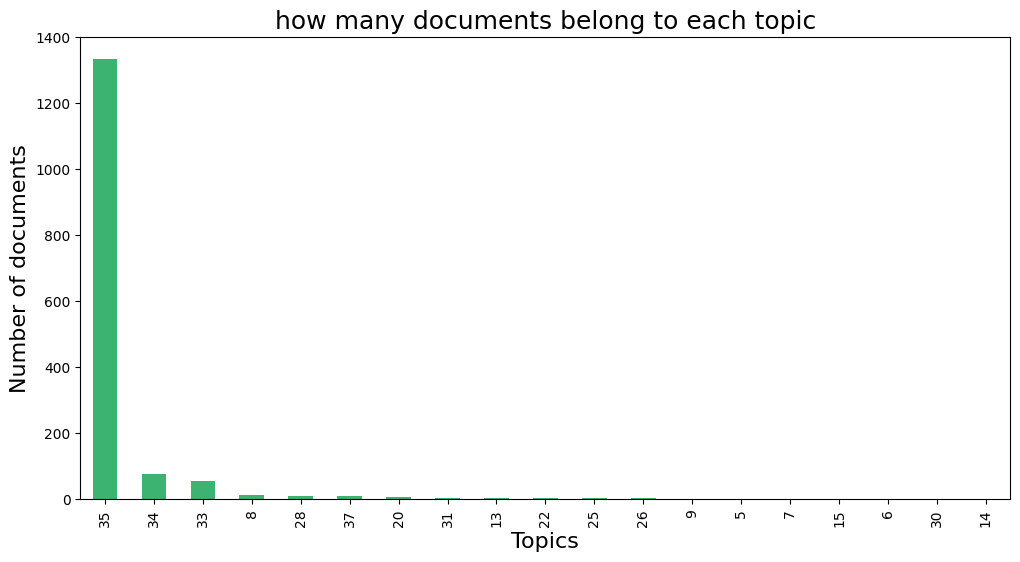

In [ ]:
topic_counts = sent_topics_for_test_df["Dominant_Topic"].value_counts()
topic_counts.plot(kind = "bar", color = "mediumseagreen", figsize = (12,6))
plt.title("how many documents belong to each topic", size = 18)
plt.xlabel("Topics", size = 16)
plt.ylabel("Number of documents", size = 16)

In [ ]:
import matplotlib.pyplot as plt